In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def clean_Aplikasi_Ecommerce(name):
    if "tiktok" in name.lower().split():
        return "Tiktok Shop"
    return name

##### Proses Pembersihan Data

In [3]:
data_kuisioner = pd.read_csv("./data/Kuisioner.csv")
data_kuisioner["Nama"] = data_kuisioner.Nama.apply(lambda v: v.lower())
data_kuisioner.drop_duplicates(subset=["Nama"], inplace=True)
data_kuisioner["Aplikasi_Ecommerce"] = data_kuisioner["Aplikasi_Ecommerce"].apply(clean_Aplikasi_Ecommerce)

data_kuisioner.head()

,Nama,Umur,Tingkatan_Pendidikan,Jenis_kelamin,Pengetahuan_Bisnis_Digital,Pengetahuan_ECommerce,Keinginan_Buka_Usaha,Aplikasi_Ecommerce,Jenis_Barang,Kelebihan_Belanja_Online,Jumlah_Barang_DIbeli_Monthly,Waktu_Belanja_Online,Faktor_Tertarik_Belanja_Online,Pengeluaran_Tiap_Belanja
0,fendi setiawan,17,SMA/SMK,Laki laki,1,5,5,Lazada,"Elektronik, Fashion, Makanan, Pakaian, Tiket",Efisien,1 - 10 Item,"Tanggal promo saja seperti (11.11, 12.12 dll)",Gratis ongkir,> Rp 100.000
1,malika faiza,15,SMA/SMK,Perempuan,2,1,3,Shopee,"Elektronik, Fashion, Pakaian, Sepatu, Buku, Ke...",Efisien,1 - 10 Item,Pertengahan bulan,Gratis ongkir,Rp 50.000 - Rp 100.000
2,fajrin amalia fauziah,16,SMA/SMK,Perempuan,3,4,4,Shopee,"Makanan, Pakaian, Kecantikan (makeup, skincare...","Promo, Harga",1 - 10 Item,Pertengahan bulan,Gratis ongkir,Rp 50.000 - Rp 100.000
4,muhamad qosim,19,SMA/SMK,Laki laki,4,4,5,Shopee,"Elektronik, Fashion, Makanan","Promo, Harga",1 - 10 Item,Awal bulan,Gratis ongkir,> Rp 100.000
5,firyal alifah anshoriyah,17,SMA/SMK,Perempuan,1,1,5,Shopee,"Fashion, Makanan, Pakaian, Sepatu, Buku, Kecan...","Promo, Harga, Efisien",1 - 10 Item,"Tanggal promo saja seperti (11.11, 12.12 dll)",sesuai kebutuhan dsn mencari diskon serta grat...,Rp 50.000 - Rp 100.000


##### Informasi Data

In [4]:
data_kuisioner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 248
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Nama                            248 non-null    object
 1   Umur                            248 non-null    int64 
 2   Tingkatan_Pendidikan            248 non-null    object
 3   Jenis_kelamin                   248 non-null    object
 4   Pengetahuan_Bisnis_Digital      248 non-null    int64 
 5   Pengetahuan_ECommerce           248 non-null    int64 
 6   Keinginan_Buka_Usaha            248 non-null    int64 
 7   Aplikasi_Ecommerce              248 non-null    object
 8   Jenis_Barang                    248 non-null    object
 9   Kelebihan_Belanja_Online        248 non-null    object
 10  Jumlah_Barang_DIbeli_Monthly    248 non-null    object
 11  Waktu_Belanja_Online            248 non-null    object
 12  Faktor_Tertarik_Belanja_Online  248 non-null    ob

## Informasi Dataset Secara General

##### Total Responden

In [5]:
print("Total Responden adalah: ", data_kuisioner.shape[0])

Total Responden adalah:  248


##### Persentase Gender Pengisi Data

In [6]:
gender_pengisi = data_kuisioner.Jenis_kelamin.value_counts()
gender_pengisi

Laki laki    140
Perempuan    108
Name: Jenis_kelamin, dtype: int64

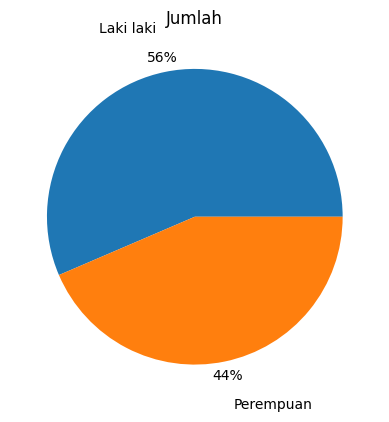

In [7]:
plt.title("Jumlah")
plt.pie(gender_pengisi, labels=gender_pengisi.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
plt.show()

##### Persentase Tingkatan Pendidikan Pengisi Kuisioner

In [8]:
pendidikan_pengisi = data_kuisioner.Tingkatan_Pendidikan.value_counts()
pendidikan_pengisi

SMA/SMK      241
Mahasiswa      7
Name: Tingkatan_Pendidikan, dtype: int64

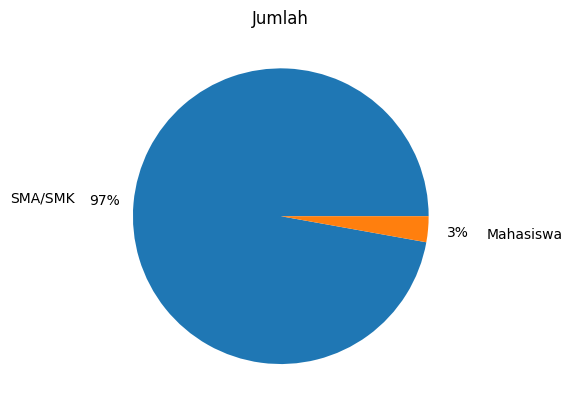

In [9]:
plt.title("Jumlah")
plt.pie(pendidikan_pengisi, labels=pendidikan_pengisi.index, autopct='%1.0f%%', pctdistance=1.2 , labeldistance=1.4)
plt.show()

##### Tingkat Umur Pengisi Kuisioner

In [10]:
ter_muda = data_kuisioner["Umur"].min()
ter_tua = data_kuisioner["Umur"].max()
rata_rata_umur = data_kuisioner["Umur"].mean()

print(f"""
Termuda  \t: {ter_muda}
Tertua   \t: {ter_tua}
rata-rata \t: {rata_rata_umur}
""")


Termuda  	: 14
Tertua   	: 24
rata-rata 	: 16.68951612903226



In [11]:
def createHorizontalBar(
    index, 
    values, 
    xlabel="Kuantitas", 
    ylabel="value", 
    title="Persebaran", 
    placing="upper right"
    ):

    y_pos = np.arange(len(index))
    fig, ax = plt.subplots(figsize=(15,6))

    hbars = ax.barh(
        y_pos, 
        values, 
        align="center", 
        color=['tab:red', 'tab:blue', 'tab:orange', 'tab:purple'],
        label=values
    )

    ax.bar_label(hbars, fmt='%.2f')
    ax.legend(index,loc=placing)
    ax.set_yticks(y_pos, index)
    ax.invert_yaxis()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    plt.show()

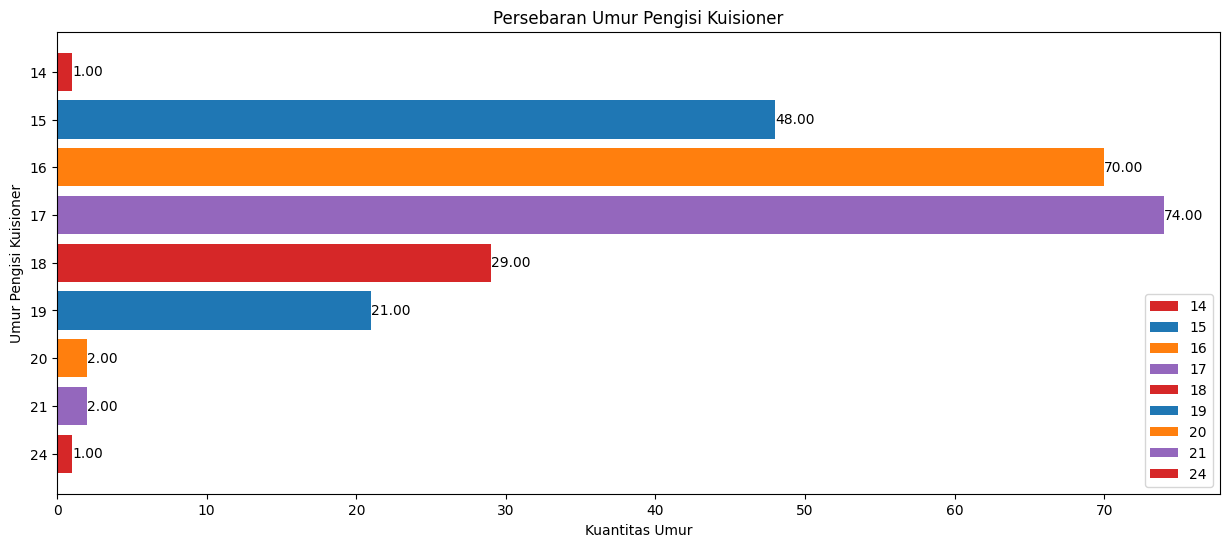

In [12]:
persebaran_umur = data_kuisioner["Umur"].value_counts().sort_index()
umur = persebaran_umur.index
banyak_umur = persebaran_umur.values

createHorizontalBar(
    umur, 
    banyak_umur, 
    xlabel="Kuantitas Umur", 
    ylabel="Umur Pengisi Kuisioner", 
    title="Persebaran Umur Pengisi Kuisioner",
    placing="lower right"
)


##### Pengetahuan Pengisi Kuisioner Terhadap Bisnis Digital (skala 1-5)

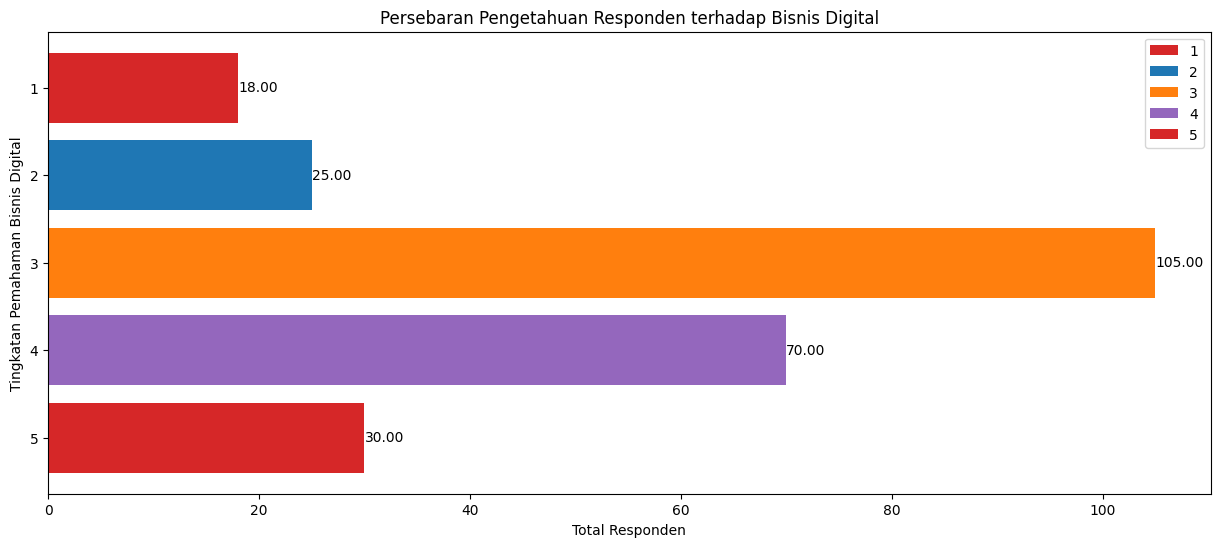

In [13]:
persebaran_pd = data_kuisioner["Pengetahuan_Bisnis_Digital"].value_counts().sort_index()
tingkatan_pd = persebaran_pd.index
jumlah_tingkatan_pd = persebaran_pd.values

createHorizontalBar(
    tingkatan_pd, 
    jumlah_tingkatan_pd, 
    xlabel="Total Responden", 
    ylabel="Tingkatan Pemahaman Bisnis Digital", 
    title="Persebaran Pengetahuan Responden terhadap Bisnis Digital"
)


##### Persebaran Pengetahuan responden Terhadap E-Commerce

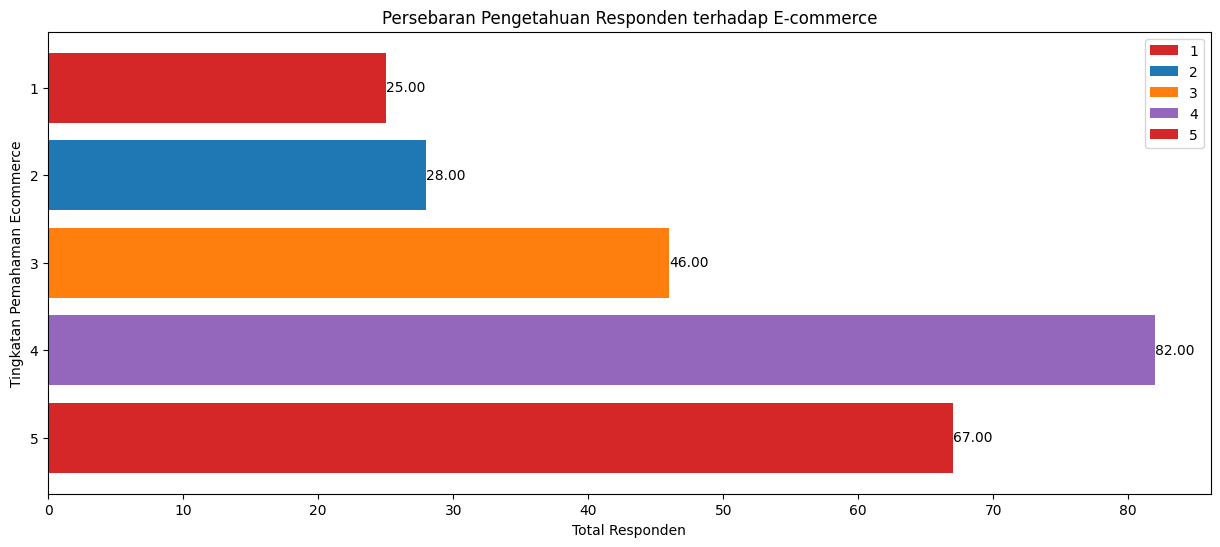

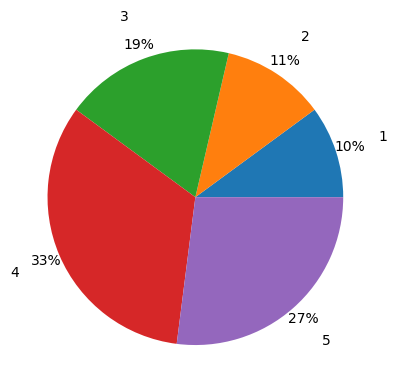

In [14]:
persebaran_pe = data_kuisioner["Pengetahuan_ECommerce"].value_counts().sort_index()
tingkatan_pe = persebaran_pe.index
jumlah_tingkatan_pe = persebaran_pe.values

createHorizontalBar(
    tingkatan_pe, 
    jumlah_tingkatan_pe, 
    xlabel="Total Responden", 
    ylabel="Tingkatan Pemahaman Ecommerce", 
    title="Persebaran Pengetahuan Responden terhadap E-commerce"
)

plt.pie(persebaran_pe, labels=persebaran_pe.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
plt.show()

##### Tingkat Keinginan Untuk Membuka Usaha

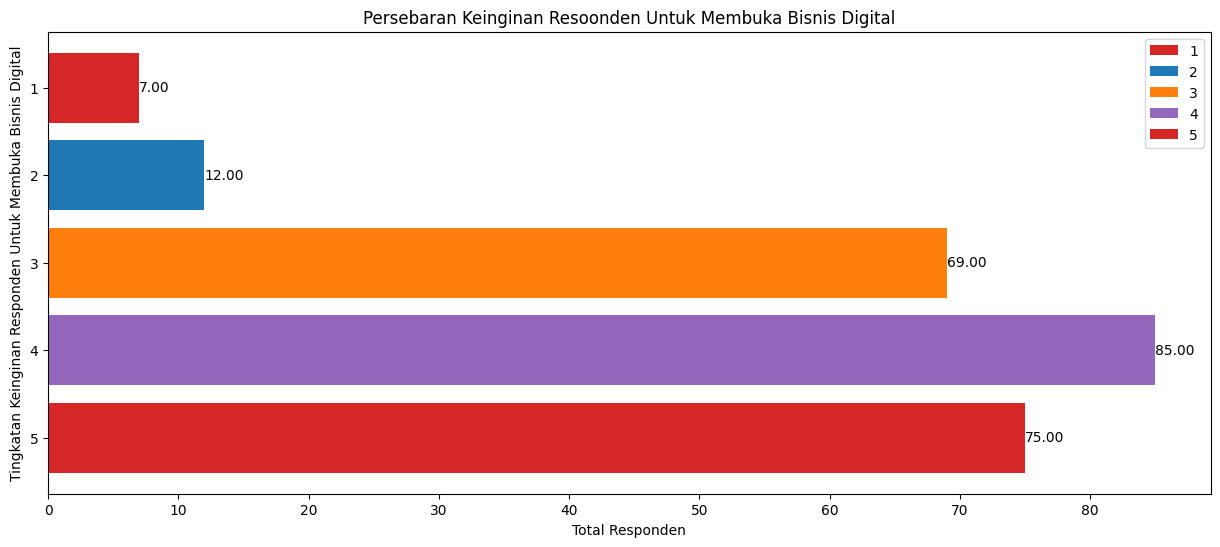

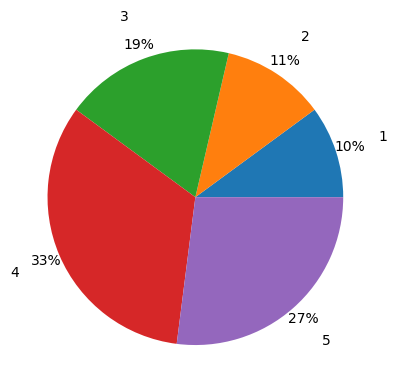

In [15]:
persebaran_bu = data_kuisioner["Keinginan_Buka_Usaha"].value_counts().sort_index()
tingkatan_bu = persebaran_bu.index
jumlah_tingkatan_bu = persebaran_bu.values

createHorizontalBar(
    tingkatan_bu, 
    jumlah_tingkatan_bu, 
    xlabel="Total Responden", 
    ylabel="Tingkatan Keinginan Responden Untuk Membuka Bisnis Digital", 
    title="Persebaran Keinginan Resoonden Untuk Membuka Bisnis Digital"
)

plt.pie(persebaran_pe, labels=persebaran_pe.index, autopct='%1.0f%%', pctdistance=1.1 , labeldistance=1.3)
plt.show()

##### Aplikasi Ecommerce yang digunakan